# Feature Engineering with SHAP values Experiment 1

SHAP Images of server with different number of poisoned clients
* number of malicious clients [0,1,2,3,4,5]

SHAP Images right after poisoning attack
* rounds [1,2,10,75,200]

Summation of Differences SHAP Images right after poisoning attack
* rounds [1,2,10,75,200]
* 5 times

## Google Colab

In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')
sys.path.append('/content/drive/My Drive/Colab Notebooks/federated_learning')

In [3]:
!pip install shap==0.40.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Experiments

In [4]:
from federated_learning.utils import SHAPUtil, experiment_util, Visualizer
from federated_learning import ClientPlane, Configuration, ObserverConfiguration
from federated_learning.server import Server
from datetime import datetime

## MNIST
(1) 5 → 4,
(2) 1 → 7,
(3) 3 → 8,

In [5]:
from federated_learning.nets import MNISTCNN
from federated_learning.dataset import MNISTDataset
import os
config = Configuration()
config.POISONED_CLIENTS = 0
config.DATA_POISONING_PERCENTAGE = 1
config.DATASET = MNISTDataset
config.MODELNAME = config.MNIST_NAME
config.NETWORK = MNISTCNN
observer_config = ObserverConfiguration()
observer_config.experiment_type = "shap_fl_poisoned"
observer_config.experiment_id = 1
observer_config.test = False
observer_config.datasetObserverConfiguration = "MNIST"
neutral_label = 2

In [6]:
# Google Colab Settigns
config.TEMP = os.path.join('/content/drive/My Drive/Colab Notebooks/temp')
config.FMNIST_DATASET_PATH = os.path.join('/content/data/fmnist')
config.MNIST_DATASET_PATH = os.path.join('/content/data/mnist')
config.CIFAR10_DATASET_PATH = os.path.join('/content/data/cifar10')
config.VM_URL = "none"

In [11]:
data = config.DATASET(config)
shap_util = SHAPUtil(data.test_dataloader) 
server = Server(config, observer_config,data.train_dataloader, data.test_dataloader, shap_util)
client_plane = ClientPlane(config, observer_config, data, shap_util)
visualizer = Visualizer(shap_util)

MNIST training data loaded.
MNIST test data loaded.
Create 200 clients with dataset of size 300


In [ ]:
import numpy as np
import copy
for i in range(199):
    experiment_util.set_rounds(client_plane, server, i+1)
    experiment_util.run_round(client_plane, server, i+1)
print("Run 199 finished")
old_params = copy.deepcopy(server.get_nn_parameters())

In [ ]:

#import torch
#torch.save(server.net.state_dict(), "/content/drive/My Drive/Colab Notebooks/temp/models/MNISTtrained2.model")

### alpha (5,4)

In [ ]:
config.FROM_LABEL = 5
config.TO_LABEL = 4

accuracies = []
recalls = []

server.net =  MNISTCNN()
server.net.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/temp/models/MNISTtrained2.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [ ]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = './results/ex3/MNIST/5_4/_run_shap_values_{}_poisoned_clients_alpha_5_4.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [ ]:
# Run 0
print(accuracies)
print(recalls)

### alpha (1,7)

In [ ]:
import copy
import torch
from federated_learning.nets import MNISTCNN
config.FROM_LABEL = 1
config.TO_LABEL = 7

server.net =  MNISTCNN()
server.net.load_state_dict(torch.load('temp/models/MNISTtrained2.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [ ]:
accuracies = []
recalls = []

In [ ]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = './results/ex3/MNIST/1_7/4_run_shap_values_{}_poisoned_clients_alpha_1_7.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [ ]:
# Run 0
print(accuracies)
print(recalls)

### alpha (3,8)

In [ ]:
import copy
import torch
from federated_learning.nets import MNISTCNN
config.FROM_LABEL = 3
config.TO_LABEL = 8

server.net =  MNISTCNN()
server.net.load_state_dict(torch.load('temp/models/MNISTtrained2.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [ ]:
accuracies = []
recalls = []

In [ ]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = './results/ex3/MNIST/3_8/4_run_shap_values_{}_poisoned_clients_alpha_3_8.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [ ]:
# Run 0
print(accuracies)
print(recalls)

## FashionMNIST
For Fashion-MNIST we experiment with 
(1) 5: sandal → 4: coat,
(2) 1: trouser → 3: dress, and 
(3) 8: Bag → 9: Ankle Boot.
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',  'Bag', 'Ankle Boot']


In [5]:
from federated_learning.nets import FMNISTCNN
from federated_learning.dataset import FMNISTDataset
import os
config = Configuration()
config.POISONED_CLIENTS = 0
config.DATA_POISONING_PERCENTAGE = 1
config.DATASET = FMNISTDataset
config.MODELNAME = config.FMNIST_NAME
config.NETWORK = FMNISTCNN
observer_config = ObserverConfiguration()
observer_config.experiment_type = "shap_fl_poisoned"
observer_config.experiment_id = 1
observer_config.test = False
observer_config.datasetObserverConfiguration = "MNIST"
neutral_label = 2

In [6]:
# Google Colab Settigns
config.TEMP = os.path.join('/content/drive/My Drive/Colab Notebooks/temp')
config.FMNIST_DATASET_PATH = os.path.join('/content/data/fmnist')
config.MNIST_DATASET_PATH = os.path.join('/content/data/mnist')
config.CIFAR10_DATASET_PATH = os.path.join('/content/data/cifar10')
config.VM_URL = "none"

In [7]:
data = config.DATASET(config)
shap_util = SHAPUtil(data.test_dataloader) 
server = Server(config, observer_config,data.train_dataloader, data.test_dataloader, shap_util)
client_plane = ClientPlane(config, observer_config, data, shap_util)
visualizer = Visualizer(shap_util)

FashionMnist training data loaded.
FashionMnist training data loaded.
Create 200 clients with dataset of size 300


In [ ]:
import numpy as np
import copy
for i in range(199):
    experiment_util.set_rounds(client_plane, server, i+1)
    experiment_util.run_round(client_plane, server, i+1)
print("Run 199 finished")
old_params = copy.deepcopy(server.get_nn_parameters())

In [ ]:
import torch
torch.save(server.net.state_dict(), "/content/drive/My Drive/Colab Notebooks/temp/models/FMNISTtrained.model")

### alpha (5,4)

In [8]:
from federated_learning.nets import FMNISTCNN
import torch
import copy
config.FROM_LABEL = 5
config.TO_LABEL = 4

server.net =  FMNISTCNN()
server.net.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/temp/models/FMNISTtrained.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [27]:
accuracies = []
recalls = []

Load default model successfully
20/200 clients cleaned
40/200 clients cleaned
60/200 clients cleaned
80/200 clients cleaned
100/200 clients cleaned
120/200 clients cleaned
140/200 clients cleaned
160/200 clients cleaned
180/200 clients cleaned
200/200 clients cleaned
Cleaning successfully


dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).



Test set: Average loss: 0.0003, Accuracy: 8917/10000 (89%)

Original tensor([0.8400, 0.9640, 0.8720, 0.9520, 0.7780, 0.9650, 0.6380, 0.9790, 0.9830,
        0.9460]) tensor([0.8400, 0.9959, 0.7863, 0.8271, 0.8447, 0.9847, 0.7659, 0.9253, 0.9733,
        0.9753]) 0.8917
No poisoning due to 0. poisoned clients
[121, 116, 128, 39, 48]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.957921
Train Epoch: 200 [10/300 (3%)]	Loss: 1.073073
Train Epoch: 200 [20/300 (7%)]	Loss: 0.756915
Train Epoch: 200 [30/300 (10%)]	Loss: 0.565111
Train Epoch: 200 [40/300 (13%)]	Loss: 0.746229
Train Epoch: 200 [50/300 (17%)]	Loss: 0.788268
Train Epoch: 200 [60/300 (20%)]	Loss: 1.500816
Train Epoch: 200 [70/300 (23%)]	Loss: 0.852010
Train Epoch: 200 [80/300 (27%)]	Loss: 0.631941
Train Epoch: 200 [90/300 (30%)]	Loss: 1.113592
Train Epoch: 200 [100/300 (33%)]	Loss: 0.927463
Train Epoch: 200 [110/300 (37%)]	Loss: 0.969695
Train Epoch: 200 [120/300 (40%)]	Loss: 0.480976
Train Epoch: 200 [130/300 (43%)]	Loss: 0.735626
Train E

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.8490, 0.9720, 0.8690, 0.8760, 0.8160, 0.9830, 0.6870, 0.9650, 0.9800,
        0.9580]) tensor([0.8473, 0.9949, 0.7914, 0.9125, 0.8226, 0.9771, 0.7141, 0.9452, 0.9810,
        0.9746]) 0.8955
Poisoned clients: 0
Load default model successfully


dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).



Test set: Average loss: 0.0003, Accuracy: 8917/10000 (89%)

Original tensor([0.8400, 0.9640, 0.8720, 0.9520, 0.7780, 0.9650, 0.6380, 0.9790, 0.9830,
        0.9460]) tensor([0.8400, 0.9959, 0.7863, 0.8271, 0.8447, 0.9847, 0.7659, 0.9253, 0.9733,
        0.9753]) 0.8917
Poison 1/200 clients
Flip 100.0% of the 5 labels to 4
[122]
[13, 112, 191, 37, 122]
Train Epoch: 200 [0/300 (0%)]	Loss: 1.340060
Train Epoch: 200 [10/300 (3%)]	Loss: 1.513743
Train Epoch: 200 [20/300 (7%)]	Loss: 1.128842
Train Epoch: 200 [30/300 (10%)]	Loss: 0.679962
Train Epoch: 200 [40/300 (13%)]	Loss: 1.431521
Train Epoch: 200 [50/300 (17%)]	Loss: 0.959353
Train Epoch: 200 [60/300 (20%)]	Loss: 1.017890
Train Epoch: 200 [70/300 (23%)]	Loss: 0.595210
Train Epoch: 200 [80/300 (27%)]	Loss: 0.826859
Train Epoch: 200 [90/300 (30%)]	Loss: 0.587805
Train Epoch: 200 [100/300 (33%)]	Loss: 1.685645
Train Epoch: 200 [110/300 (37%)]	Loss: 0.699398
Train Epoch: 200 [120/300 (40%)]	Loss: 0.758675
Train Epoch: 200 [130/300 (43%)]	Lo

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.8420, 0.9760, 0.8170, 0.8690, 0.8870, 0.9390, 0.6890, 0.9780, 0.9760,
        0.9530]) tensor([0.8540, 0.9899, 0.8475, 0.9186, 0.7680, 0.9905, 0.7133, 0.9140, 0.9839,
        0.9656]) 0.8926
Poisoned clients: 1
Load default model successfully
20/200 clients cleaned
40/200 clients cleaned
60/200 clients cleaned
80/200 clients cleaned
100/200 clients cleaned
120/200 clients cleaned
140/200 clients cleaned
160/200 clients cleaned
180/200 clients cleaned
200/200 clients cleaned
Cleaning successfully


dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).



Test set: Average loss: 0.0003, Accuracy: 8917/10000 (89%)

Original tensor([0.8400, 0.9640, 0.8720, 0.9520, 0.7780, 0.9650, 0.6380, 0.9790, 0.9830,
        0.9460]) tensor([0.8400, 0.9959, 0.7863, 0.8271, 0.8447, 0.9847, 0.7659, 0.9253, 0.9733,
        0.9753]) 0.8917
Poison 2/200 clients
Flip 100.0% of the 5 labels to 4
[ 94 133]
[27, 38, 66, 94, 133]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.738435
Train Epoch: 200 [10/300 (3%)]	Loss: 1.253435
Train Epoch: 200 [20/300 (7%)]	Loss: 0.656618
Train Epoch: 200 [30/300 (10%)]	Loss: 0.567170
Train Epoch: 200 [40/300 (13%)]	Loss: 0.830380
Train Epoch: 200 [50/300 (17%)]	Loss: 0.866943
Train Epoch: 200 [60/300 (20%)]	Loss: 1.462308
Train Epoch: 200 [70/300 (23%)]	Loss: 0.867865
Train Epoch: 200 [80/300 (27%)]	Loss: 1.123481
Train Epoch: 200 [90/300 (30%)]	Loss: 0.822075
Train Epoch: 200 [100/300 (33%)]	Loss: 1.330540
Train Epoch: 200 [110/300 (37%)]	Loss: 0.732242
Train Epoch: 200 [120/300 (40%)]	Loss: 0.687481
Train Epoch: 200 [130/300 (43%)]	

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.8700, 0.9730, 0.8140, 0.9280, 0.8650, 0.8630, 0.6340, 0.9520, 0.9770,
        0.9750]) tensor([0.8116, 0.9929, 0.8550, 0.8649, 0.7849, 0.9977, 0.7629, 0.9024, 0.9760,
        0.9121]) 0.8851
Poisoned clients: 2
Load default model successfully
20/200 clients cleaned
40/200 clients cleaned
60/200 clients cleaned
80/200 clients cleaned
100/200 clients cleaned
120/200 clients cleaned
140/200 clients cleaned
160/200 clients cleaned
180/200 clients cleaned
200/200 clients cleaned
Cleaning successfully


dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).



Test set: Average loss: 0.0003, Accuracy: 8917/10000 (89%)

Original tensor([0.8400, 0.9640, 0.8720, 0.9520, 0.7780, 0.9650, 0.6380, 0.9790, 0.9830,
        0.9460]) tensor([0.8400, 0.9959, 0.7863, 0.8271, 0.8447, 0.9847, 0.7659, 0.9253, 0.9733,
        0.9753]) 0.8917
Poison 3/200 clients
Flip 100.0% of the 5 labels to 4
[ 51 173 145]
[188, 189, 51, 173, 145]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.976821
Train Epoch: 200 [10/300 (3%)]	Loss: 0.662179
Train Epoch: 200 [20/300 (7%)]	Loss: 0.659544
Train Epoch: 200 [30/300 (10%)]	Loss: 1.358485
Train Epoch: 200 [40/300 (13%)]	Loss: 0.497080
Train Epoch: 200 [50/300 (17%)]	Loss: 0.219916
Train Epoch: 200 [60/300 (20%)]	Loss: 0.902269
Train Epoch: 200 [70/300 (23%)]	Loss: 1.088966
Train Epoch: 200 [80/300 (27%)]	Loss: 1.000028
Train Epoch: 200 [90/300 (30%)]	Loss: 0.923140
Train Epoch: 200 [100/300 (33%)]	Loss: 0.933598
Train Epoch: 200 [110/300 (37%)]	Loss: 1.128733
Train Epoch: 200 [120/300 (40%)]	Loss: 0.394201
Train Epoch: 200 [130/300 

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.8230, 0.9790, 0.8670, 0.9140, 0.7450, 0.5210, 0.7220, 0.9750, 0.9720,
        0.9580]) tensor([0.8591, 0.9919, 0.7918, 0.8655, 0.6147, 0.9962, 0.6729, 0.8937, 0.9798,
        0.9457]) 0.8476
Poisoned clients: 3
Load default model successfully
20/200 clients cleaned
40/200 clients cleaned
60/200 clients cleaned
80/200 clients cleaned
100/200 clients cleaned
120/200 clients cleaned
140/200 clients cleaned
160/200 clients cleaned
180/200 clients cleaned
200/200 clients cleaned
Cleaning successfully


dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).



Test set: Average loss: 0.0003, Accuracy: 8917/10000 (89%)

Original tensor([0.8400, 0.9640, 0.8720, 0.9520, 0.7780, 0.9650, 0.6380, 0.9790, 0.9830,
        0.9460]) tensor([0.8400, 0.9959, 0.7863, 0.8271, 0.8447, 0.9847, 0.7659, 0.9253, 0.9733,
        0.9753]) 0.8917
Poison 4/200 clients
Flip 100.0% of the 5 labels to 4
[191 140  81  10]
[9, 191, 140, 81, 10]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.505484
Train Epoch: 200 [10/300 (3%)]	Loss: 0.973650
Train Epoch: 200 [20/300 (7%)]	Loss: 0.590023
Train Epoch: 200 [30/300 (10%)]	Loss: 0.493493
Train Epoch: 200 [40/300 (13%)]	Loss: 1.437968
Train Epoch: 200 [50/300 (17%)]	Loss: 0.820792
Train Epoch: 200 [60/300 (20%)]	Loss: 0.534195
Train Epoch: 200 [70/300 (23%)]	Loss: 0.879558
Train Epoch: 200 [80/300 (27%)]	Loss: 0.694345
Train Epoch: 200 [90/300 (30%)]	Loss: 0.545787
Train Epoch: 200 [100/300 (33%)]	Loss: 0.309440
Train Epoch: 200 [110/300 (37%)]	Loss: 1.150533
Train Epoch: 200 [120/300 (40%)]	Loss: 0.247910
Train Epoch: 200 [130/300

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.8330, 0.9630, 0.8320, 0.9100, 0.8950, 0.0730, 0.6260, 0.9670, 0.9780,
        0.9540]) tensor([0.8552, 0.9969, 0.8287, 0.8750, 0.4347, 1.0000, 0.7616, 0.9183, 0.9683,
        0.9550]) 0.8031
Poisoned clients: 4
Load default model successfully
20/200 clients cleaned
40/200 clients cleaned
60/200 clients cleaned
80/200 clients cleaned
100/200 clients cleaned
120/200 clients cleaned
140/200 clients cleaned
160/200 clients cleaned
180/200 clients cleaned
200/200 clients cleaned
Cleaning successfully


dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).



Test set: Average loss: 0.0003, Accuracy: 8917/10000 (89%)

Original tensor([0.8400, 0.9640, 0.8720, 0.9520, 0.7780, 0.9650, 0.6380, 0.9790, 0.9830,
        0.9460]) tensor([0.8400, 0.9959, 0.7863, 0.8271, 0.8447, 0.9847, 0.7659, 0.9253, 0.9733,
        0.9753]) 0.8917
Poison 5/200 clients
Flip 100.0% of the 5 labels to 4
[100 159  10 130 147]
[100, 159, 10, 130, 147]
Train Epoch: 200 [0/300 (0%)]	Loss: 2.349453
Train Epoch: 200 [10/300 (3%)]	Loss: 1.361810
Train Epoch: 200 [20/300 (7%)]	Loss: 0.569414
Train Epoch: 200 [30/300 (10%)]	Loss: 0.633107
Train Epoch: 200 [40/300 (13%)]	Loss: 1.012248
Train Epoch: 200 [50/300 (17%)]	Loss: 0.273463
Train Epoch: 200 [60/300 (20%)]	Loss: 1.460319
Train Epoch: 200 [70/300 (23%)]	Loss: 0.852024
Train Epoch: 200 [80/300 (27%)]	Loss: 1.429056
Train Epoch: 200 [90/300 (30%)]	Loss: 0.518702
Train Epoch: 200 [100/300 (33%)]	Loss: 1.456697
Train Epoch: 200 [110/300 (37%)]	Loss: 0.742061
Train Epoch: 200 [120/300 (40%)]	Loss: 1.001094
Train Epoch: 200 [

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.8460, 0.9670, 0.8770, 0.8740, 0.7870, 0.0010, 0.6510, 0.9630, 0.9620,
        0.9410]) tensor([0.8385, 0.9959, 0.7541, 0.9123, 0.3900, 1.0000, 0.7298, 0.9215, 0.9867,
        0.9721]) 0.7869
Poisoned clients: 5


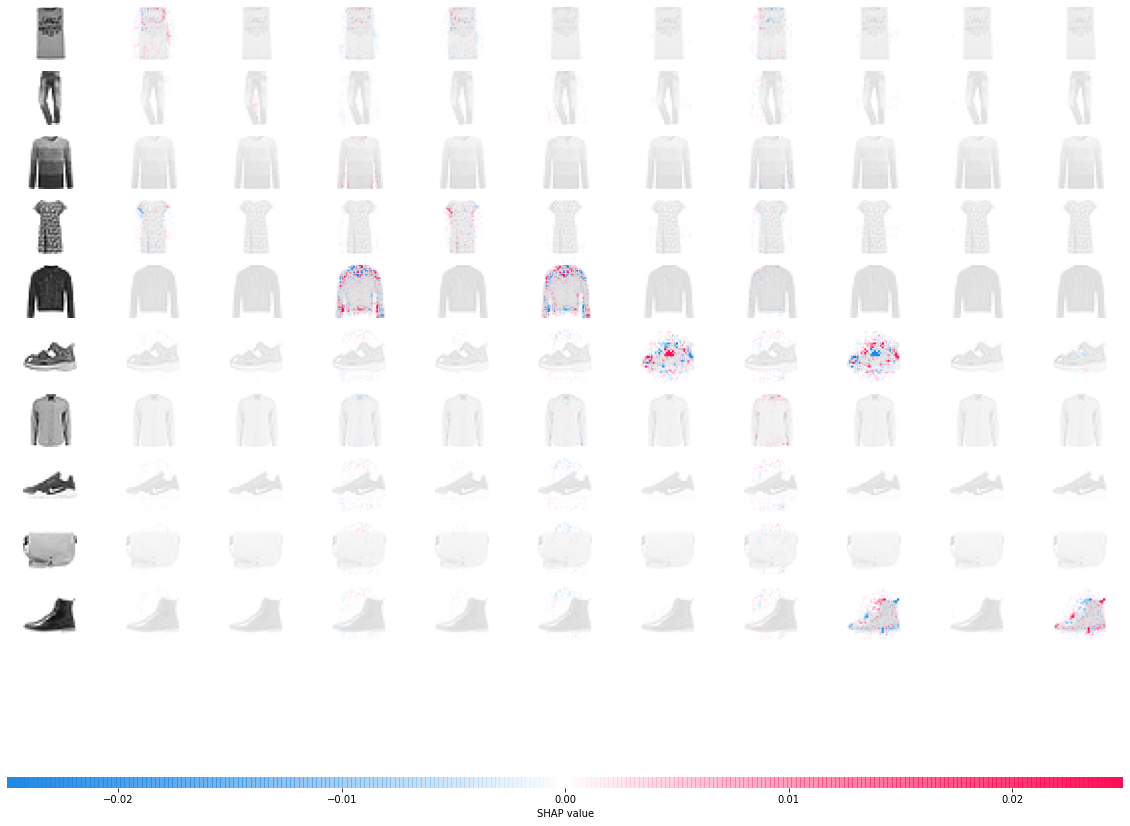

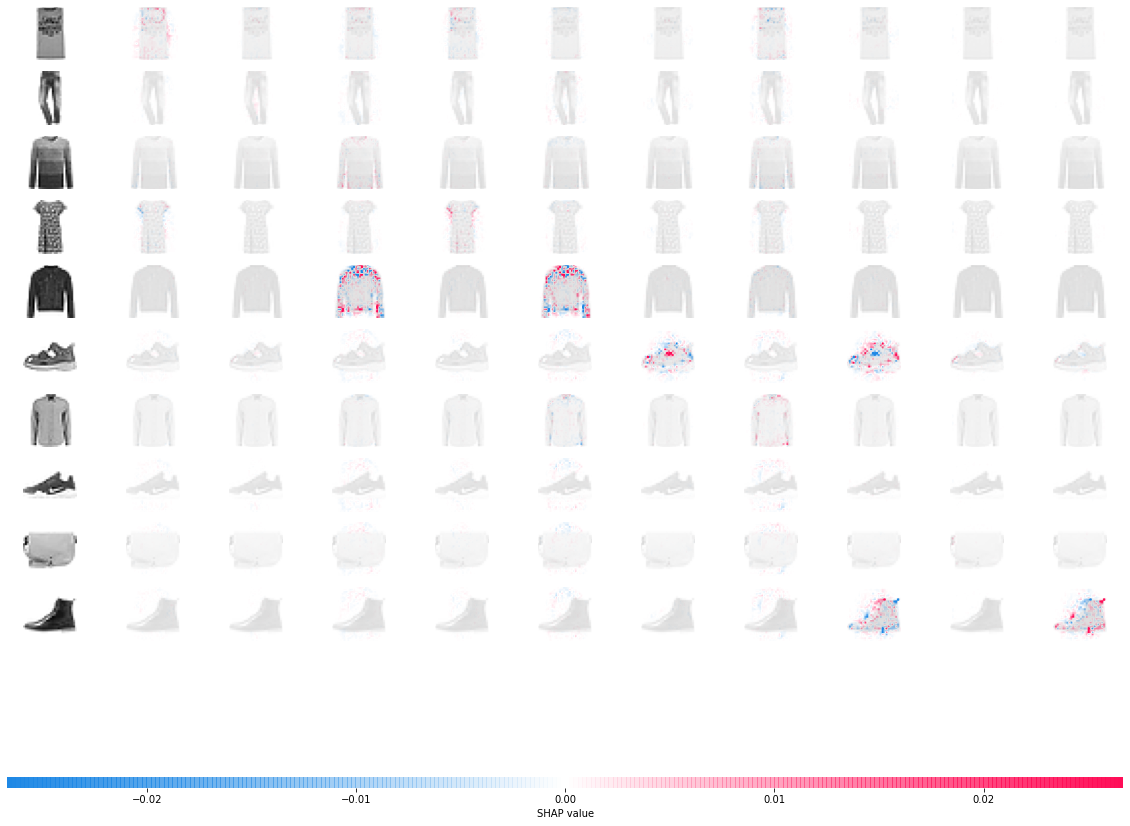

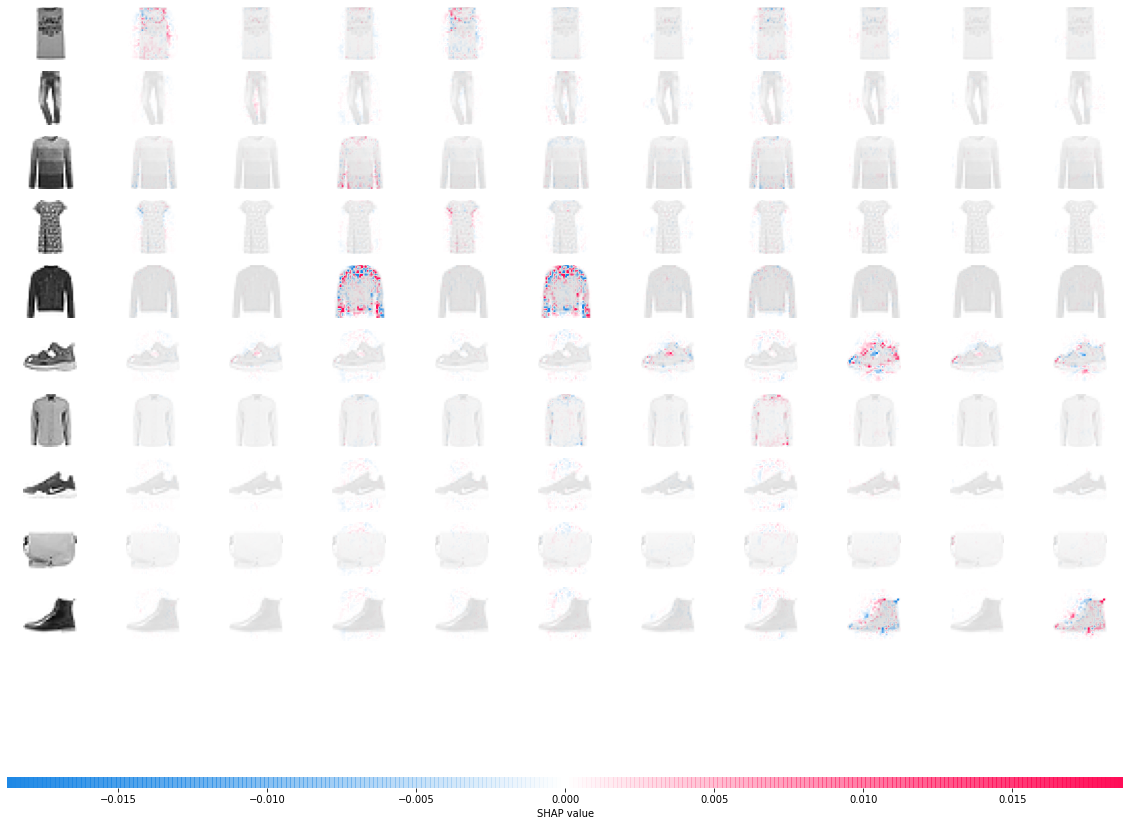

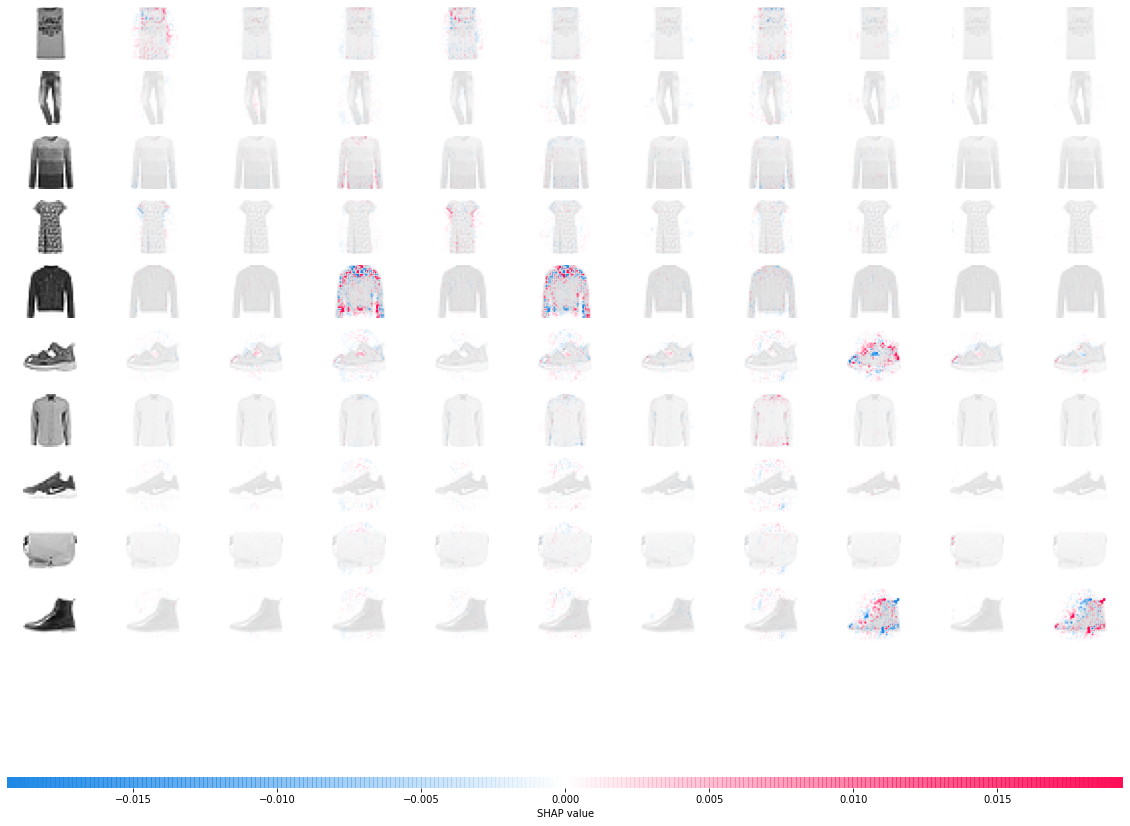

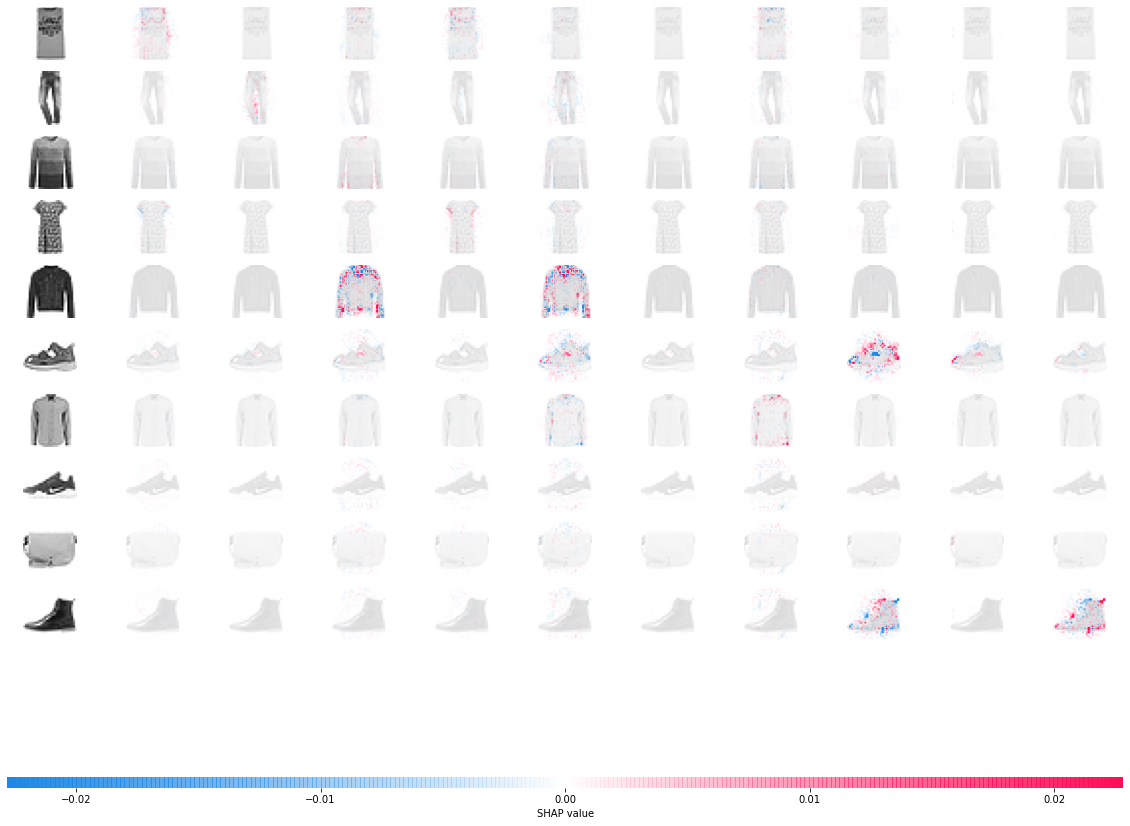

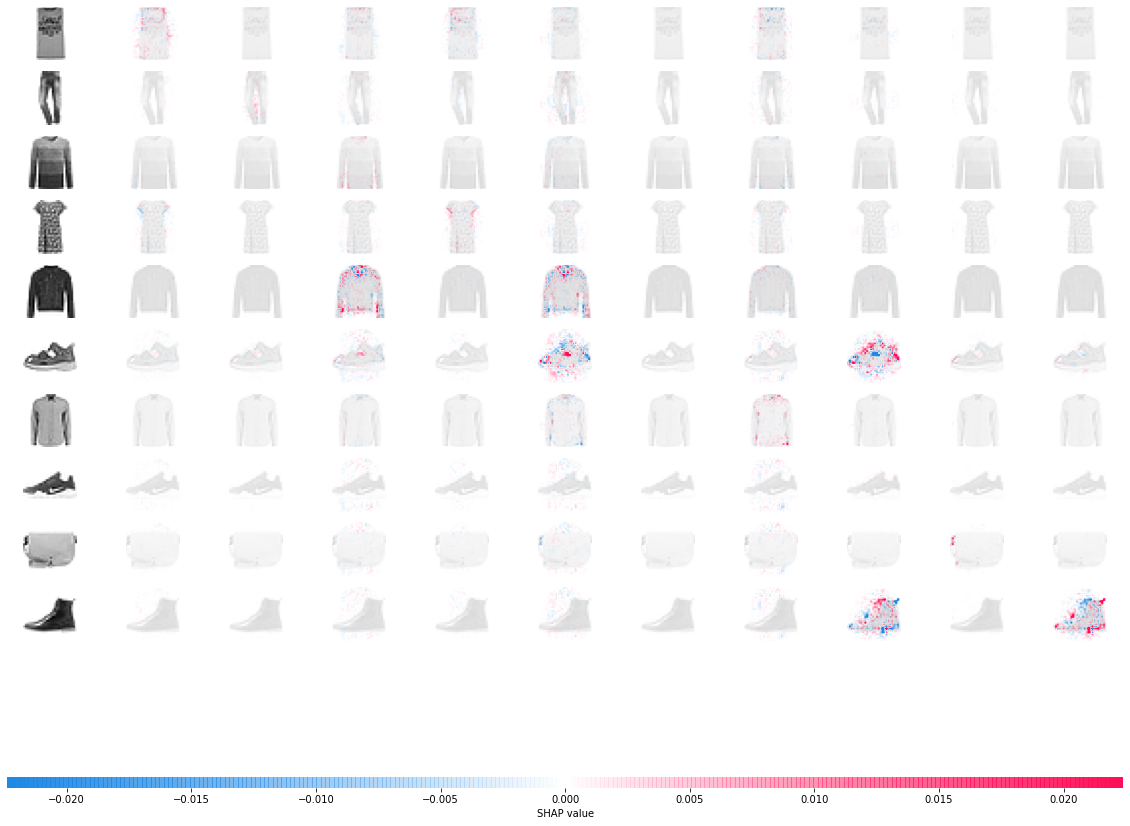

In [28]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = '/content/drive/My Drive/Colab Notebooks/results/ex3/FMNIST/5_4/3_run_shap_values_{}_poisoned_clients_alpha_5_4.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [29]:

print(accuracies)
print(recalls)

[0.8955, 0.8926, 0.8851, 0.8476, 0.8031, 0.7869]
[tensor([0.8490, 0.9720, 0.8690, 0.8760, 0.8160, 0.9830, 0.6870, 0.9650, 0.9800,
        0.9580]), tensor([0.8420, 0.9760, 0.8170, 0.8690, 0.8870, 0.9390, 0.6890, 0.9780, 0.9760,
        0.9530]), tensor([0.8700, 0.9730, 0.8140, 0.9280, 0.8650, 0.8630, 0.6340, 0.9520, 0.9770,
        0.9750]), tensor([0.8230, 0.9790, 0.8670, 0.9140, 0.7450, 0.5210, 0.7220, 0.9750, 0.9720,
        0.9580]), tensor([0.8330, 0.9630, 0.8320, 0.9100, 0.8950, 0.0730, 0.6260, 0.9670, 0.9780,
        0.9540]), tensor([0.8460, 0.9670, 0.8770, 0.8740, 0.7870, 0.0010, 0.6510, 0.9630, 0.9620,
        0.9410])]


## alpha(1,3)

In [30]:
from federated_learning.nets import FMNISTCNN
import torch
import copy
config.FROM_LABEL = 1
config.TO_LABEL = 3

server.net =  FMNISTCNN()
server.net.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/temp/models/FMNISTtrained.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [38]:
accuracies = []
recalls = []

In [ ]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = '/content/drive/My Drive/Colab Notebooks/results/ex3/FMNIST/1_3/0_run_shap_values_{}_poisoned_clients_alpha_1_3.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

Load default model successfully
20/200 clients cleaned
40/200 clients cleaned
60/200 clients cleaned
80/200 clients cleaned
100/200 clients cleaned
120/200 clients cleaned
140/200 clients cleaned
160/200 clients cleaned
180/200 clients cleaned
200/200 clients cleaned
Cleaning successfully


dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).



Test set: Average loss: 0.0003, Accuracy: 8917/10000 (89%)

Original tensor([0.8400, 0.9640, 0.8720, 0.9520, 0.7780, 0.9650, 0.6380, 0.9790, 0.9830,
        0.9460]) tensor([0.8400, 0.9959, 0.7863, 0.8271, 0.8447, 0.9847, 0.7659, 0.9253, 0.9733,
        0.9753]) 0.8917
No poisoning due to 0. poisoned clients
[95, 182, 68, 67, 195]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.092664
Train Epoch: 200 [10/300 (3%)]	Loss: 0.927539
Train Epoch: 200 [20/300 (7%)]	Loss: 0.987796
Train Epoch: 200 [30/300 (10%)]	Loss: 0.464739
Train Epoch: 200 [40/300 (13%)]	Loss: 0.102674
Train Epoch: 200 [50/300 (17%)]	Loss: 0.609748
Train Epoch: 200 [60/300 (20%)]	Loss: 0.346466
Train Epoch: 200 [70/300 (23%)]	Loss: 0.578197
Train Epoch: 200 [80/300 (27%)]	Loss: 0.479058
Train Epoch: 200 [90/300 (30%)]	Loss: 0.494256
Train Epoch: 200 [100/300 (33%)]	Loss: 0.541251
Train Epoch: 200 [110/300 (37%)]	Loss: 1.301268
Train Epoch: 200 [120/300 (40%)]	Loss: 0.584725
Train Epoch: 200 [130/300 (43%)]	Loss: 0.698749
Train Ep

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9040, 0.9720, 0.8060, 0.9300, 0.8740, 0.9530, 0.5980, 0.9790, 0.9790,
        0.9490]) tensor([0.7847, 0.9959, 0.8657, 0.8824, 0.7938, 0.9865, 0.7628, 0.9210, 0.9849,
        0.9694]) 0.8944
Poisoned clients: 0
Load default model successfully


dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).



Test set: Average loss: 0.0003, Accuracy: 8917/10000 (89%)

Original tensor([0.8400, 0.9640, 0.8720, 0.9520, 0.7780, 0.9650, 0.6380, 0.9790, 0.9830,
        0.9460]) tensor([0.8400, 0.9959, 0.7863, 0.8271, 0.8447, 0.9847, 0.7659, 0.9253, 0.9733,
        0.9753]) 0.8917
Poison 1/200 clients
Flip 100.0% of the 1 labels to 3
[78]
[160, 19, 136, 156, 78]
Train Epoch: 200 [0/300 (0%)]	Loss: 1.156123
Train Epoch: 200 [10/300 (3%)]	Loss: 0.591136
Train Epoch: 200 [20/300 (7%)]	Loss: 0.975266
Train Epoch: 200 [30/300 (10%)]	Loss: 0.427480
Train Epoch: 200 [40/300 (13%)]	Loss: 0.625389
Train Epoch: 200 [50/300 (17%)]	Loss: 0.541008
Train Epoch: 200 [60/300 (20%)]	Loss: 0.509679
Train Epoch: 200 [70/300 (23%)]	Loss: 0.374072
Train Epoch: 200 [80/300 (27%)]	Loss: 0.500495
Train Epoch: 200 [90/300 (30%)]	Loss: 1.313887
Train Epoch: 200 [100/300 (33%)]	Loss: 0.761535
Train Epoch: 200 [110/300 (37%)]	Loss: 0.670533
Train Epoch: 200 [120/300 (40%)]	Loss: 0.757867
Train Epoch: 200 [130/300 (43%)]	Los

In [ ]:
print(accuracies)
print(recalls)

alpha(8,9)

In [ ]:
from federated_learning.nets import FMNISTCNN
import torch
import copy
config.FROM_LABEL = 1
config.TO_LABEL = 3

server.net =  FMNISTCNN()
server.net.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/temp/models/FMNISTtrained.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [ ]:
accuracies = []
recalls = []

In [ ]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = '/content/drive/My Drive/Colab Notebooks/results/ex3/FMNIST/8_9/0_run_shap_values_{}_poisoned_clients_alpha_8_9.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [ ]:
print(accuracies)
print(recalls)